In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
dados = pd.read_csv('CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv')
display(dados)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


<AxesSubplot:xlabel='CodingHours', ylabel='Count'>

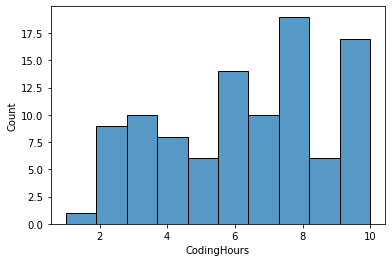

In [8]:
sns.histplot(dados['CodingHours'], bins=10)